In [81]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib. pyplot as plt
import numpy as np
import random
import math
%matplotlib inline

#### 3) Calcula la función de correlación para cada una de las cajas de datos del inciso anterior, usando los estimadores de

    a) Peebles-Hauser

    b) Davis-Peebles

    c) Hamilton

    d) Landy-Szalay

y recuerda escoger un bin adecuado para ver las señales. Utiliza 10 veces el número de puntos en las muestras aleatorias que con los datos.

In [82]:
def dis(x,y,z):
    return pow(pow(x,2)+pow(y,2)+pow(z,2),0.5) #teorema de pitagoras

In [83]:
def dis_NN(m):
    dis_2d = open('Distancias.dat',"w")
    dis_2d.close()
    dis_2d = open('Distancias.dat',"w")
    N = len(m[:,0])
    for i in range(N):
        for j in range(N):
            if i != j: # No consideramos distancias entre un mismo punto.
                if i > j: #No consideramos las mismas distancias repetidas entre puntos repetidos.
                    dis_2d.write("%f\n" % dis( m[:,0][i]-m[:,0][j], m[:,1][i]-m[:,1][j], 0 ))
                    
    dis_2d.close()
    distancias = np.loadtxt('Distancias.dat')
    return distancias

In [84]:
def graf_histo (Dist,bins_0):
    plt.figure()
    histo_2d = np.array(Dist) 
    plt.figure()
    plt.hist(histo_2d, bins=bins_0)
    plt.title("Histograma de distancias",fontsize=18)
    plt.ylabel("Frecuencia",fontsize=18) 
    plt.xlabel("Distancia",fontsize=18)
    plt.show()

In [85]:
def graf_histo (Dist,B):
    plt.figure()
    histo_2d = np.array(Dist) 
    plt.figure()
    plt.hist(histo_2d, bins=B)
    plt.title("Histograma de distancias",fontsize=18)
    plt.ylabel("Frecuencia",fontsize=18) 
    plt.xlabel("Distancia",fontsize=18)
    plt.show()

#### Peebles-Hauser

In [86]:
def Pee_Hau(DD,RR,Nd,Nr):
    n = pow((Nr*(Nr-1))/(Nd*(Nd-1)),0.5)
    return ((np.divide(DD,RR))/pow(n,2))-1

#### Davis-Peebles

In [87]:
def Dav_Pee(DD,RR,Nd,Nr):
    n = pow((Nr*(Nr-1))/(Nd*(Nd-1)),1/2)
    return ((np.divide(DD,RR))/(n**2))-1

#### Hamilton

#### Landy-Szalay

#### MALLA

In [88]:
def malla_cuad (tamaño,ret): 
    DD = [] 
    DD = open('Tabla_Datos_malla.dat',"w")  #abrimos un scrip para manejar los datos.
    c, d = 0, 0
    for i in range(int(tamaño/ret)): 
        for j in range(int(tamaño/ret)):
            c, d  = i*ret, j*ret #acomoda los puntos en y
            DD.write("%f  \t%f \n" % (c,d))
    DD.close()
    return np.loadtxt('Tabla_Datos_malla.dat') 

#### DISCO

In [89]:
def disco_random (rad,puntos):
    D = []
    D = open('Tabla_Datos_disco.dat',"w")  #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        r = pow(random.randrange(0,rad**2,1),0.5) #Radio aleatorio tomando en cuenta el jacobiano.
        th = random.random()*2*math.pi #valor de theta aleatorio, 
        x = r*math.cos(th) # usando la ecuación parametrica del círculo 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y)) 
    D.close()
    return np.loadtxt('Tabla_Datos_disco.dat')

#### ANILLO

In [90]:
def anillo_random(rad_ex,rad_in,puntos):
    D = []
    D = open('Tabla_Datos_Aro.dat',"w")  #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        r = pow(random.randrange(rad_in**2,rad_ex**2,1),0.5) #puntos aleatorios en un radio interior y uno exterior
        th = random.random()*2*math.pi
        x = r*math.cos(th) 
        y = r*math.sin(th)
        D.write("%f  \t%f \n" % (x,y))
    D.close()
    return np.loadtxt('Tabla_Datos_Aro.dat') # u = RR_1[:,0] y v = RR_1[:,1]

#### ANILLOS DISPERSOS

In [91]:
def anillos_randoms_2(num_anillos, rad_in,rad_ext, puntos, tam_caja):
     
    D_5 = open('Tabla_Datos_anillos_aleatorios2.dat',"w")  #abrimos un scrip para manejar los datos.
    
    for i in range(num_anillos):
        r_x0 = random.randrange(0,tam_caja,1) # coordenada x donde se ubicará el anillo
        r_y0 = random.randrange(0,tam_caja,1) # coordenada y donde se ubicará el anillo
        
        for j in range(puntos):
            r = pow(random.randrange(rad_in**2,rad_ext**2,1),0.5)
            th = random.random()*2*math.pi
            x = r*math.cos(th) + r_x0
            y = r*math.sin(th) + r_y0
            if 0<x<tam_caja and 0<y<tam_caja:
                D_5.write("%f  \t%f \n" % (x,y))
    D_5.close()
    
    return np.loadtxt('Tabla_Datos_anillos_aleatorios2.dat')

Creamos los datos:

In [149]:
Dt_1 = malla_cuad(1000,25) #hacemos una malla de tamaño 1000x1000 (10x10 cada reticula)
Dt_2 = disco_random(300,100) #Hacemos un disco de radio 300 con 1000 pntos
Dt_3 = anillo_random(300,290,100) # Anillo de radio interno 290 y radio externo 300 con 1000 puntos
Dt_4 = anillos_randoms_2(50,290,300,10,1000)

Calcualamos sus distancias

In [136]:
dis_D_1 = dis_NN(Dt_1)

In [137]:
dis_D_2 = dis_NN(Dt_2)

In [138]:
dis_D_3 = dis_NN(Dt_3)

In [150]:
dis_D_4 = dis_NN(Dt_4)

Creamos los Datos aleatorios R

In [128]:
def caja_Rand(dim,puntos): 
    R = open('Tabla_Aleatorios.dat',"w") #abrimos un scrip para manejar los datos.
    for i in range(puntos):
        a, b = 0, 0 #iniciamos las variables
        a = random.random()*dim #random.random sólo da valores entre 0 y 1 por lo que lo multiplico por la dimención de la caja
        b = random.random()*dim
        R.write("%f  \t%f \n" % (a,b)) #escribimos los valores en el scip.
    R.close()
    return np.loadtxt('Tabla_Aleatorios.dat') # x = RR[:,0] | y = RR[:,1]

In [140]:
dimencion = 1000
puntos = len(Dt_1)*10
Rt_1 = caja_Rand(dimencion,puntos) #hacemos la caja

In [141]:
dis_R_1 = dis_NN(Rt_1) #arreglo de distancias de datos

In [142]:
dimencion = 1000
puntos = len(Dt_2)*10
Rt_2 = caja_Rand(dimencion,puntos) #hacemos la caja

In [143]:
dis_R_2 = dis_NN(Rt_2) #arreglo de distancias de datos

In [144]:
dimencion = 1000
puntos = len(Dt_3)*10
Rt_3 = caja_Rand(dimencion,puntos) #hacemos la caja

In [145]:
dis_R_3 = dis_NN(Rt_3) #arreglo de distancias de datos

In [151]:
dimencion = 1000
puntos = len(Dt_4)*10
Rt_4 = caja_Rand(dimencion,puntos) #hacemos la caja

In [152]:
dis_R_4 = dis_NN(Rt_4) #arreglo de distancias de datos

#### a) Peebles-Hauser

In [162]:
binn = 50
frec_D_1, bins_D_1 = Histo_dist(dis_D_1,binn)

<Figure size 432x288 with 0 Axes>

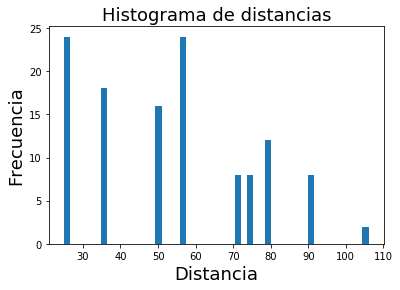

In [163]:
graf_histo(dis_D_1,binn)

In [114]:
frec_R_1, bins_R_1 = Histo_dist(dis_R_1,binn)

In [115]:
PH_1 = Pee_Hau(frec_D_1,frec_R_1,len(Dt_al),len(Rt_1))

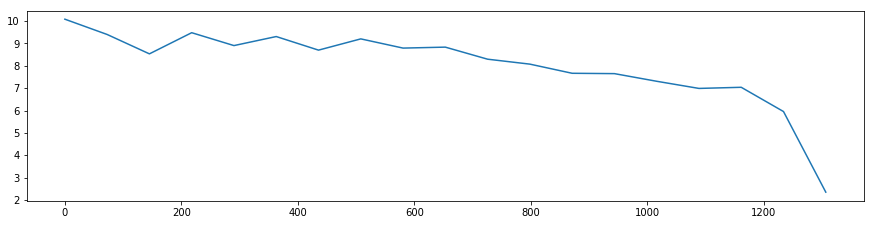

In [116]:
plt.figure(figsize=(15,3.5))
plt.plot(bins_R_1[:-1],PH_1)